In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

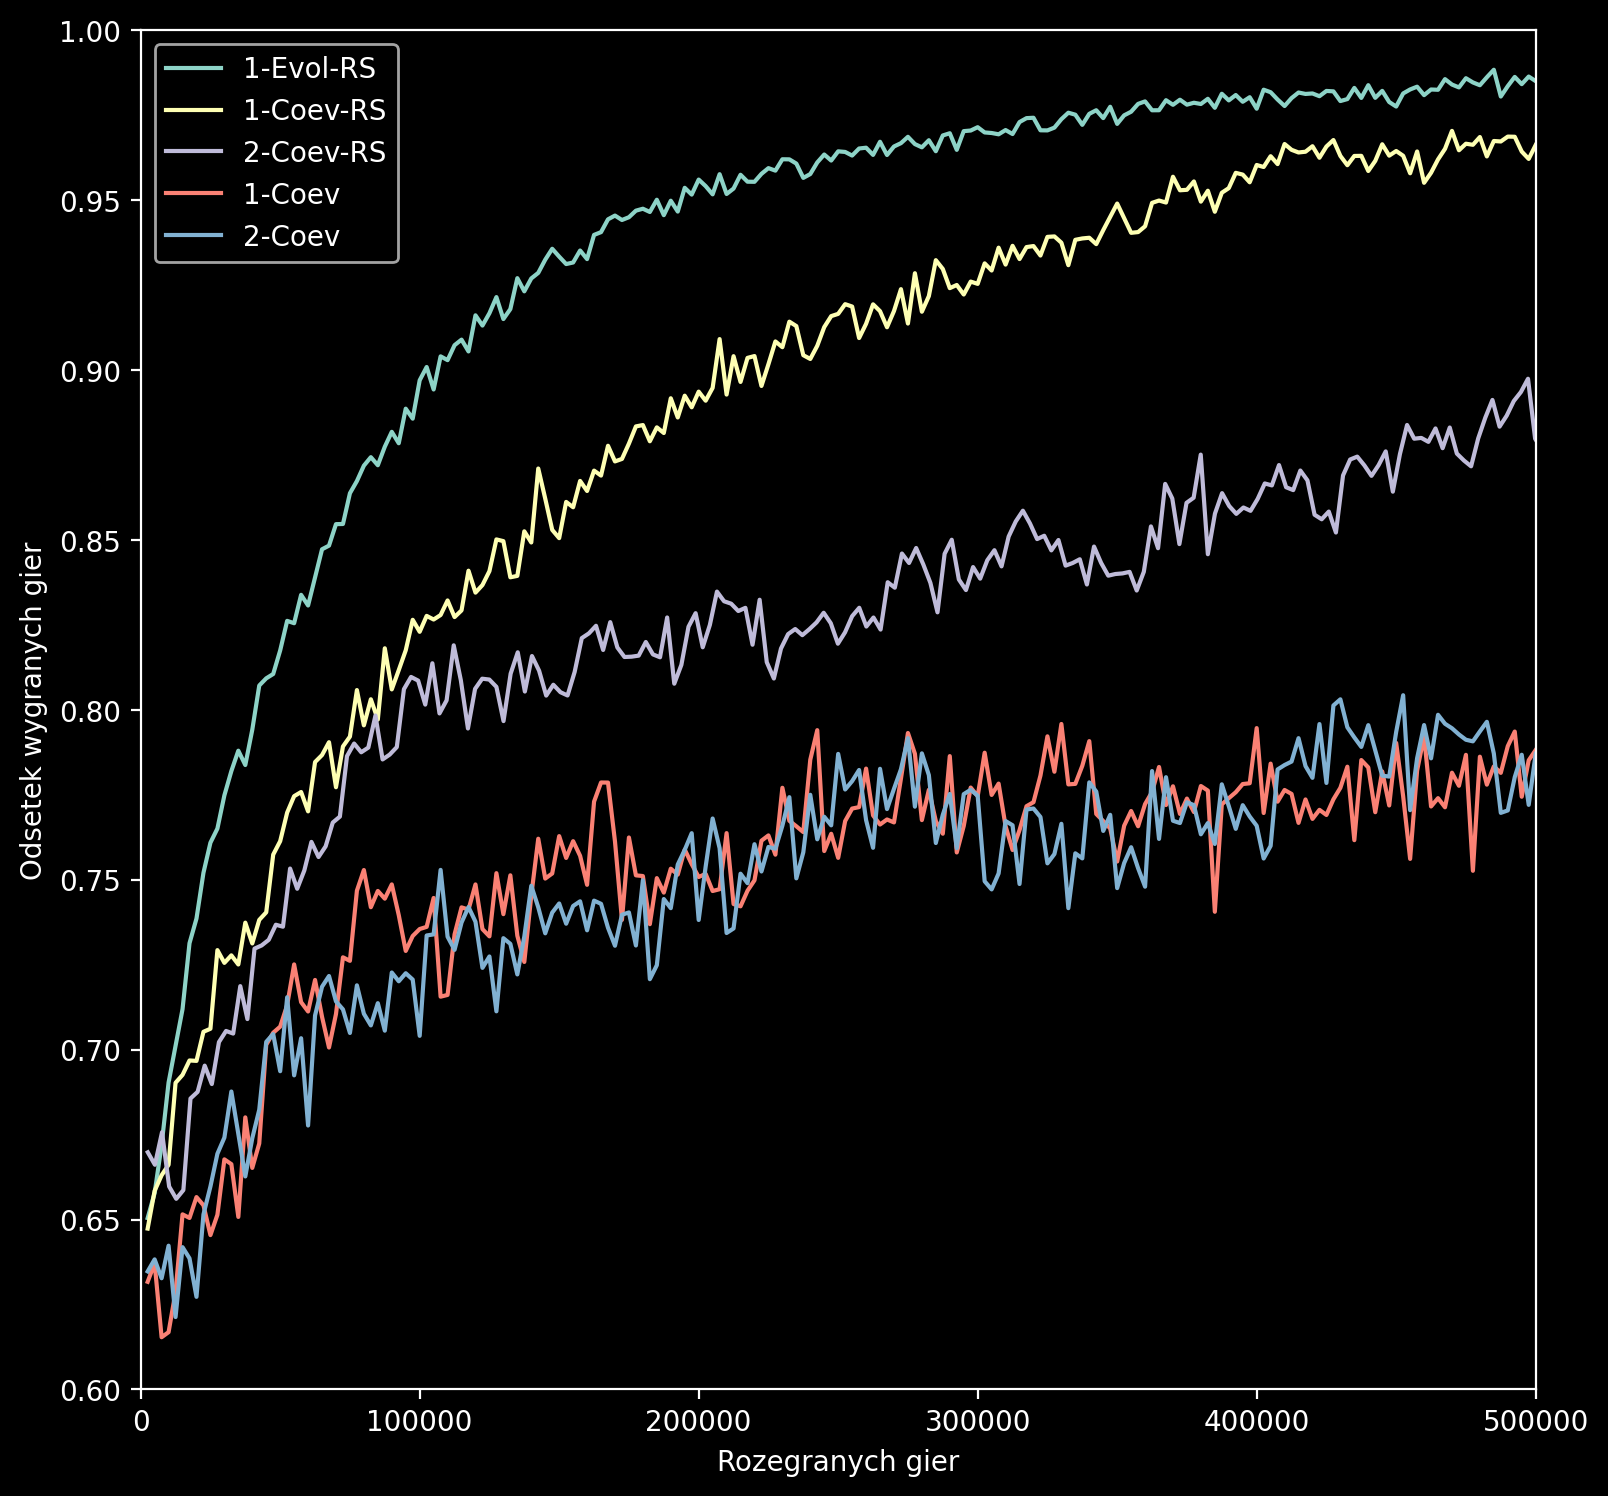

In [60]:
plt.figure(figsize=(9, 9), dpi = 200)
plt.style.use(['dark_background'])

evol_rs_1 = pd.read_csv('1evolrs.csv')
coev_rs_1 = pd.read_csv('1coevrs.csv')
coev_rs_2 = pd.read_csv('2coevrs.csv')
coev_1 = pd.read_csv('1coev.csv')
coev_2 = pd.read_csv('2coev.csv')

algorithms = [evol_rs_1, coev_rs_1, coev_rs_2, coev_1, coev_2]
labels = ['1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev']

for algorithm in algorithms:
    plt.plot(algorithm['effort'], algorithm.iloc[:, 2:].mean(axis=1))

plt.xlabel('Rozegranych gier')
plt.ylabel('Odsetek wygranych gier')

plt.xlim(xmin=0, xmax=500000)
plt.ylim(ymin=0.6, ymax=1.0)

plt.legend(labels)

plt.show()

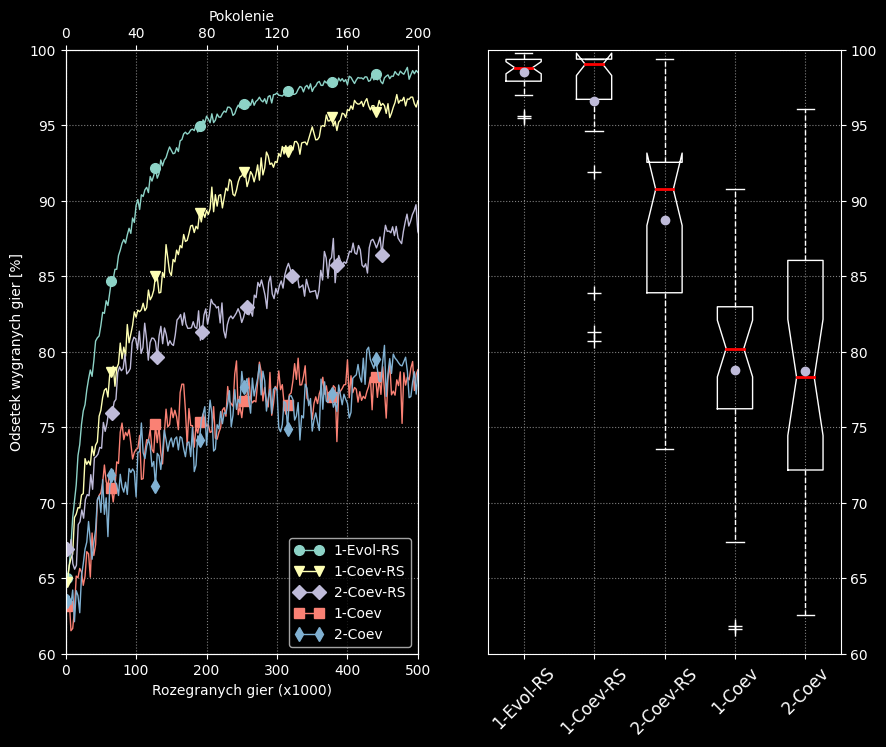

In [61]:
fig = plt.figure(figsize=(10, 8), dpi = 100)
ax1, ax2 = fig.subplots(1, 2)

markers = ['o', 'v', 'D', 's', 'd']

for algorithm in algorithms:
    ax1.plot(algorithm['effort']/1000, algorithm.iloc[:, 2:].mean(axis=1)*100, linewidth=1, marker=markers.pop(0), markevery=25, markersize=7)

ax1.set_xlabel('Rozegranych gier (x1000)')
ax1.set_ylabel('Odsetek wygranych gier [%]')

x_steps = algorithms[1]['generation'].tolist()
x_steps.append(200)

ax1_2 = ax1.twiny()
ax1_2.set_xticks(x_steps[::40])
ax1_2.set_xlabel('Pokolenie')

ax1.grid(linestyle='dotted', color='grey')

ax1.set_xlim(xmin=0, xmax=500)
ax1.set_ylim(ymin=60, ymax=100)
ax1.legend(labels, numpoints = 2)

data = []

for algorithm in algorithms:
    data.append(algorithm.iloc[-1, 2:]*100)

bp = ax2.boxplot(data, notch ='True', showmeans = True)

ax2.grid(linestyle='dotted', color='grey')

ax2.set_xticklabels(labels, rotation=45, fontsize=12)
ax2.set_ylim(ymin=60, ymax=100)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

for median in bp['medians']: 
    median.set(color ='red', linewidth = 2) 
    
for flier in bp['fliers']: 
    flier.set(marker ='+', markersize = 10) 
    
for whisker in bp['whiskers']:
    whisker.set_linestyle('dashed')
    
for means in bp['means']:
    means.set(marker = 'o')

plt.show()